# Define and train a convolutional neural network on MNIST dataset

 **Using Tensorflow GPU instead of Tensorflow CPU (default)**

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 377.0MB 50kB/s 


**Import packages**

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint

**Check tensorflow's version**

In [3]:
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

1.14.0
Found GPU at: /device:GPU:0


**Mount google drive**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Load, preprocess and split dataset**

In [5]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data 
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11493376/11490434 [==============================] - 0s 0us/step


**Data augmentation**

In [0]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,  
    width_shift_range=0.1, 
    height_shift_range=0.1
)  

**Define convolutional neural network**

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

W0901 01:13:36.840597 140634309322624 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Show model summary**

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0

**Using adam optomizer and cross entropy cost**

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**Define callbacks**

In [10]:
# Decrease learning rate each epoch
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# Save the best checkpoint
checkpoint = ModelCheckpoint(
    filepath="/content/gdrive/My Drive/Tensorflow/checkpoints/mnist.hdf5", 
    monitor='val_acc', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=False, 
    mode='auto', 
    period=1
)
callbacks = [annealer, checkpoint]

W0901 01:14:09.624326 140634309322624 callbacks.py:875] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


**Define number of epochs and batch size**

In [0]:
EPOCHS = 20
BATCH_SIZE = 64

**Train this network**

In [12]:
model.fit_generator(
    datagen.flow(x_train,y_train, batch_size=BATCH_SIZE),
    epochs=EPOCHS, 
    steps_per_epoch=x_train.shape[0]//BATCH_SIZE,  
    validation_data=(x_val,y_val), 
    callbacks=callbacks, 
    verbose=1
)

Epoch 1/20
780/781 [============================>.] - ETA: 0s - loss: 0.4057 - acc: 0.8752
Epoch 00001: val_acc improved from -inf to 0.98050, saving model to /content/gdrive/My Drive/Tensorflow/checkpoints/mnist.hdf5
781/781 [==============================] - 21s 27ms/step - loss: 0.4053 - acc: 0.8753 - val_loss: 0.0650 - val_acc: 0.9805
Epoch 2/20
780/781 [============================>.] - ETA: 0s - loss: 0.1208 - acc: 0.9638
Epoch 00002: val_acc improved from 0.98050 to 0.99020, saving model to /content/gdrive/My Drive/Tensorflow/checkpoints/mnist.hdf5
781/781 [==============================] - 16s 20ms/step - loss: 0.1207 - acc: 0.9639 - val_loss: 0.0346 - val_acc: 0.9902
Epoch 3/20
778/781 [============================>.] - ETA: 0s - loss: 0.0882 - acc: 0.9739
Epoch 00003: val_acc improved from 0.99020 to 0.99060, saving model to /content/gdrive/My Drive/Tensorflow/checkpoints/mnist.hdf5
781/781 [==============================] - 16s 20ms/step - loss: 0.0883 - acc: 0.9738 - val_lo

# Load and evaluate trained model

In [0]:
from tensorflow.keras.models import load_model

In [14]:
model = load_model("/content/gdrive/My Drive/Tensorflow/checkpoints/mnist.hdf5")

W0901 01:19:48.778312 140634309322624 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0901 01:19:48.780498 140634309322624 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0901 01:19:48.806813 140634309322624 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecat

In [15]:
model.evaluate(x_val, y_val)

10000/10000 [==============================] - 1s 125us/sample - loss: 0.0173 - acc: 0.9958


[0.01734215567089268, 0.9958]

**Predict some inputs**

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
INPUT_INDEX = 11

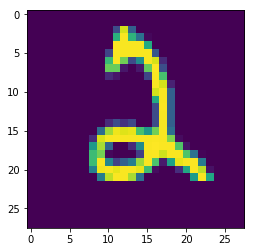

In [45]:
plt.imshow(x_val[INPUT_INDEX][:,:,0])

In [46]:
pred_result = model.predict(x_val[INPUT_INDEX].reshape(1, 28, 28, 1))
pred_value = np.argmax(pred_result)

print("Predict value: " + str(pred_value))

Predict value: 2
